# 형태소 분석
형태소 분석(Morphological Analysis)은 자연 언어의 문장을 형태소”라는 의미를 갖는 최소 단위로 분할되고, 품사를 판별하는 작업<br />
품사 사전과 문법 사전을 기반으로 대조하면서 형태소를 분석<br />
형태소 분석은 기계 번역, 텍스트 마이닝 등의 여러 분야에서 활용<br />

# 한국어 형태소 분석 라이브러리
수많은 형태소 분석 라이브러리가 오픈소스로 배포되고 있음<br />
파이썬에서도 사용할 수 있음<br /> 
라이브러리를 이용하면 직접 사전을 준비하고, 형태소 분석 알고리즘을 구현하지 않아도 형태소 분석을 할 수 있음<br />

# KoNLPy
파이썬 KoNLPy라이브러리를 이용하면 한국어 형태소 분석을 할 수 있음<br />
한나눔, 꼬꼬마, Komoran, MeCab, 트위터 등의 형태소 분석기를 쉽게 사용할 수 있음<br />
한국어를 제대로 분석할 수 있는 분석기는 Kkma와 Twitter밖에 없다<br />
Kkma의 경우는 NNG, JKM, VV, EPH, EFN처럼 품사가 나와서 무엇을 의미하는지 알기 힘듦<br />

# 환경 설정 및 설치
KoNLPy하려면 먼저 JDK가 설치되어 있어야 하면 운영체제 환경변수에 JAVA_HOME 환경변수를 만든 후에  java_jdk가 설치되어 있는 경로를 설정해 준다.<br />
pip install -U "jpype1<1.1" <br />
pip install konlpy <br />

#pip list : tweepy를 3.7.0 ~3.10.0 사이가 아니면  삭제 후 다시 설치<br />
pip uninstall tweepy<br />
pip install tweepy==3.7.0<br />

In [1]:
from konlpy.tag import Okt
okt = Okt()
# pos()함수는 각 단어 마다의 단어와 단어의 품사를 가져온다.
# 
malist = okt.pos("아버지 가방에 들어가신다.", norm=True, stem=True)
print(malist)
# norm옵션을 지정하면, ”그래욬ㅋㅋ?“처럼 작성했을 경우 ”그래요“처럼 변환해주며, 
# stem옵션을 지정하면 ”그렇다“라고 원형을 찾아준다.

# 단어와 품사가 확인해준다.

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [9]:
# 말뭉치를 사용하기 위해서는 회원가입하고 말뭉치 신청을 해야 함.
# github에 있는 BEXX0003.txt를 사용하면 됨.

# 출현 빈도수 가져오기.
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt 
# utf-16 인코딩으로 파일을 열고 글자를 출력하기 --- (※1)
fp = codecs.open("BEXX0003.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body > text")
text = body.getText()
# 텍스트를 한 줄씩 처리하기 --- (※2)
twitter = Okt()
word_dic = {}
lines = text.split("\n")
for line in lines:
    malist = twitter.pos(line) ; # print(malist)
    '''
    [('제', 'Noun'), ('1', 'Number'), ('편', 'Noun'), ('어둠', 'Noun'), 
    ('의', 'Josa'), ('발', 'Noun'), ('소리', 'Noun')]
    '''
    for word in malist:
        if word[1] == "Noun": #  명사 확인하기 --- (※3)
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1 # 카운트하기
# 많이 사용된 명사 출력하기 --- (※4)
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
for word, count in keys[:50]: #상위 50개만 
    print("{0}({1}) ".format(word, count), end="")
print()

것(644) 그(554) 말(485) 안(304) 소리(196) 길(194) 용이(193) 눈(188) 놈(180) 내(174) 사람(167) 봉(165) 치수(160) 평산(160) 얼굴(156) 거(152) 네(151) 일(149) 이(148) 못(147) 댁(141) 생각(141) 때(139) 강청댁(137) 수(134) 서방(131) 집(131) 나(122) 더(120) 서희(119) 머(116) 어디(112) 마을(111) 최(110) 년(109) 김(99) 칠성(97) 구천이(96) 니(96) 뒤(91) 제(90) 날(90) 아이(88) 하나(84) 녀(83) 두(83) 참판(82) 월(82) 손(81) 임(79) 


# Word2Vec
“Word2Vec”은 문장 내부의 단어를 벡터로 변환하는 도구<br />
단어의 연결을 기반으로 단어의 연관성을 벡터로 만들어줌<br />
단어를 벡터로 만들면 단어와 단어의 유사도를 쉽게 확인할 수 있음<br />
다음 그림은 Word2Vec으로 글을 읽게 하고 단어를 2차원 그래프에 그린 것<br />
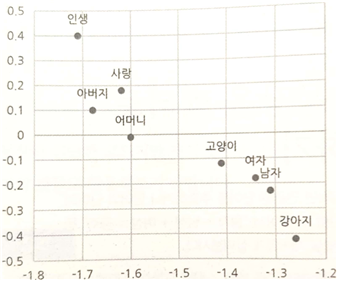
“아버지”와 “어머니”는 “사랑”과 가깝다<br />
“인생”과 “개”, “고양이”는 멀리 있다는 것을 알 수 있다<br />
이런 분석으로 단어의 연관성을 분석한다.<br />
“아빠 – 남자 + 여자 ”라는 계산식을 하면 “엄마”가 나온다<br />

Word2Vec를 사용하기 위해 gensim을 설치한다.<br />
pip install gensim

In [17]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from gensim.models import word2vec
# utf-16 인코딩으로 파일을 열고 글자를 출력하기 --- (※1)
fp = codecs.open("BEXX0003.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body > text")
text = body.getText()
# 텍스트를 한 줄씩 처리하기 --- (※2)
twitter = Okt()
results = []
lines = text.split("\r\n")
for line in lines:
    # 형태소 분석하기 --- (※3)
    # 단어의 기본형 사용
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외 
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
#print(r)
#print(results)

# 파일로 출력하기  --- (※4)
gubun_file = 'toji.gubun'
with open(gubun_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
# Word2Vec 모델 만들기 --- (※5) 
data = word2vec.LineSentence(gubun_file)
model = word2vec.Word2Vec(data, 
    vector_size=200, window=10, hs=1, min_count=2, sg=1)
# size는 벡터의 수 : 실험에서는 100~300 값으로 설정해 사용하곤 한다
# window는 앞 뒤로 고려하는 단어의 개수
# min count는 최소 빈도수, 해당 빈도수보다 작게 등장한 단어의 경우 모델 학습에서 배제
# sg은 0또는 1; skip-gram의 경우 1; 그렇지 않으면 CBOW.
# hs는 0또는 1; 1인 경우 계층적 softmax가 모델 학습에 사용
#               0이고 음수가 0이 아닌 경우 음수 샘플링이 사용됩니다.

model.save("toji.model") #  모델 생성
print("ok")

ok


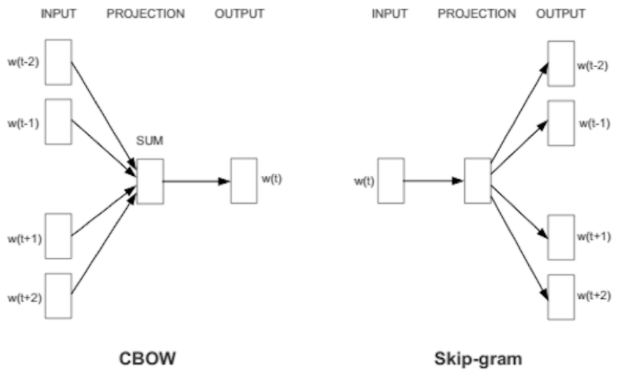

CBOW는 컨텍스트를 사용하여 대상 단어를 예측하는 반면 skip-gram은 단어를 사용하여 대상 컨텍스트를 예측한다는 것입니다. 일반적으로 skip-gram 방식은 한 단어에 대해 두 가지 의미를 포착할 수 있기 때문에 CBOW 방식에 비해 더 나은 성능을 가질 수 있습니다. 예를 들어 Apple에 대한 두 가지 벡터 표현이 있습니다. 하나는 회사에 대한 것이고 다른 하나는 과일에 대한 것입니다

In [4]:
from gensim.models import word2vec 
# 생성한 모델로 베이지안 필터에 활용
model = word2vec.Word2Vec.load("toji.model")
# 베이지 필터를 이용해서 땅에 관련된 내용만 가지고 옴.
print(model.wv.most_similar(positive=["땅"])) 

[('구멍', 0.8641393780708313), ('꾼', 0.8437658548355103), ('바꾸다', 0.8432906270027161), ('이슬', 0.8416029214859009), ('베', 0.8349119424819946), ('작정', 0.8330029845237732), ('조상', 0.8320674896240234), ('삼', 0.8320065140724182), ('백산', 0.8289090394973755), ('풍요', 0.8286736607551575)]


In [6]:
model.wv["땅"]

array([ 0.02580806,  0.11833628, -0.07735206,  0.08899633, -0.10691188,
        0.24598214,  0.07223246, -0.09520086, -0.03267304, -0.04166974,
       -0.02825762,  0.02834231,  0.10880835,  0.07500747,  0.05985226,
        0.05474808,  0.31229123, -0.2746584 ,  0.0236871 , -0.07510649,
        0.12868999,  0.14914183,  0.06409492, -0.18708958,  0.061706  ,
       -0.01024261,  0.03043238,  0.07706548, -0.0049569 ,  0.22767332,
        0.01852861,  0.07635321, -0.05252293,  0.01334242, -0.09394962,
        0.01249291, -0.2081325 , -0.02010141,  0.00743008,  0.06886396,
       -0.04469041,  0.04849559,  0.02584078, -0.09415945, -0.17315947,
       -0.10007636,  0.03404111, -0.01354429, -0.03844791, -0.00839704,
        0.10776979, -0.10176765, -0.06308526, -0.0535388 ,  0.04256864,
       -0.15326756,  0.15611789, -0.08732162,  0.03982886,  0.00420682,
       -0.00975576, -0.09462197, -0.32777938,  0.30463958, -0.12136672,
        0.02673981, -0.04262467,  0.1052867 , -0.03324623, -0.15

In [7]:
len(model.wv["땅"])

200

In [9]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("toji.model")
print(model.wv.most_similar(positive=["집"]))

[('제', 0.7706013917922974), ('구석', 0.7685752511024475), ('남정', 0.7271589636802673), ('그까짓', 0.7261282801628113), ('말짱', 0.718261182308197), ('마침', 0.7125808000564575), ('매', 0.7119995355606079), ('사나', 0.7092111706733704), ('이지마', 0.707752525806427), ('우리', 0.7048901319503784)]


# 루비 설치
https://rubyinstaller.org/downloads/

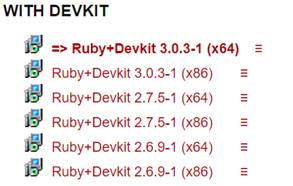

루비를 다운로드 받아 설치한다. 설치 후 프롬프트에서 아래 명령을 실행

wp2txt를 설치한다. ( 맥  사용자는 여기부터  )

c:> gem install wp2txt

xml파일을 txt로 변환한다.

c:> wp2txt --input-file ./kowiki-latest-pages-articles.xml

여러개의 텍스트 파일을 하나로 합친다.powersheell에서 cat명령을 사용한다.

c:> cat kowiki-latest-pages-articles-*.txt > wiki.txt <br />
실행시간이 4시간 이상걸릴 수 있습니다.

In [ ]:
# 시간이 무척 오래 걸림.
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from gensim.models import word2vec
# 파일 열기
readFp = codecs.open("wiki.txt", "r", encoding="utf-8")
gubun_file = "wiki.gubun"
writeFp = open(gubun_file, "w", encoding="utf-8")
# 형태소 분석 --- (※2)
twitter = Okt()
i = 0
# 텍스트를 한 줄씩 처리하기
while True:
    line = readFp.readline()
    if not line: break
    if i % 20000 == 0:
        print("current - " + str(i))
    i += 1
    # 형태소 분석
    malist = twitter.pos(line, norm=True, stem=True)
    # 필요한 어구만 대상으로 하기
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외 
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            writeFp.write(word[0] + " ")
writeFp.close()

In [22]:
from gensim.models import word2vec
data = word2vec.Text8Corpus("wiki.gubun")
model = word2vec.Word2Vec(data) 
# data, vector_size=100, window=5, hs=1, min_count=1, sg=1)
# Word2Vec 모델 만들기
model.save("wiki.model")
print("ok")

ok


In [24]:
from gensim.models import word2vec
# 모델을 불러온다.
model = word2vec.Word2Vec.load('wiki.model')
model.wv.most_similar(positive=["Python","파이썬"]) # 두 글자에 해당하는 글자가 있는지 비교

[('Java', 0.9237908124923706),
 ('스크립트', 0.883826494216919),
 ('Lisp', 0.8795396089553833),
 ('IDE', 0.8763120770454407),
 ('VHDL', 0.8747830390930176),
 ('application', 0.8695873618125916),
 ('POSIX', 0.8683142066001892),
 ('자바스크립트', 0.8675870299339294),
 ('툴킷', 0.8641968965530396),
 ('DOM', 0.8637654781341553)]

In [2]:
model.wv.most_similar(positive=["아빠","여성"],negative=["남성"])[0]

('엄마', 0.806297779083252)

In [30]:
model.wv.most_similar(positive=["왕자","여성"],negative=["남성"])[0:5]

[('여왕', 0.6681610941886902),
 ('공주', 0.6631975769996643),
 ('왕비', 0.6539091467857361),
 ('왕녀', 0.6437827348709106),
 ('왕', 0.6290043592453003)]

In [31]:
model.wv.most_similar(positive=["서울","일본"],negative=["한국"])[0:5]

[('오사카', 0.5926117300987244),
 ('교토', 0.5704297423362732),
 ('도쿄', 0.5358720421791077),
 ('上京', 0.47637733817100525),
 ('지방재판소', 0.45574498176574707)]

In [32]:
model.wv.most_similar(positive=["서울","중국"],negative=["한국"])[0:5]

[('베이징', 0.6676950454711914),
 ('우한', 0.5753980278968811),
 ('북경', 0.5700119733810425),
 ('옌안', 0.5463683605194092),
 ('상하이', 0.5420531630516052)]

In [33]:
model.wv.most_similar(positive=["오른쪽","남자"],negative=["왼쪽"])[0]

('여자', 0.7813071012496948)

In [34]:
model.wv.most_similar(positive=["서울","맛집"])[0:5]

[('목포', 0.6981028914451599),
 ('서울시', 0.6954939961433411),
 ('여의도', 0.6862083673477173),
 ('대구', 0.6847037672996521),
 ('인천', 0.6838042140007019)]

In [35]:
model.wv["고양이"]

array([-0.5879089 ,  0.7160707 , -0.63743424,  0.5916823 ,  0.6483732 ,
       -1.1699338 ,  0.05905781,  1.2085228 ,  0.32056943, -0.4851116 ,
       -0.65722543,  1.8855795 ,  0.02662493,  0.11286543,  3.11675   ,
       -0.26822254,  0.70381105, -1.6339861 , -0.22890031, -2.3092346 ,
       -0.97797114,  0.6293271 ,  1.8874424 ,  0.2988532 , -0.38220122,
       -0.07861234,  1.5912219 , -2.8610141 ,  2.4275806 ,  2.2052639 ,
        0.10022268, -0.28597715, -0.26246017,  0.3807703 ,  0.74054503,
        2.187006  , -1.2304994 ,  2.340044  , -0.6310636 , -1.6200192 ,
        1.0140454 ,  1.8191077 , -1.2430735 ,  0.055448  ,  0.63974696,
       -1.1389556 ,  0.23449287,  1.9012924 , -0.2416645 ,  2.6880648 ,
       -1.2145813 , -0.82203144,  1.721589  , -0.405279  , -0.5817576 ,
        1.5870575 , -1.4308301 ,  0.24809945, -2.9210153 ,  0.729148  ,
        1.3224305 ,  1.7299472 , -2.0686274 ,  0.04709513, -0.5162354 ,
        0.40182638, -0.29287833,  1.5646642 ,  0.72802144,  0.48

In [36]:
len(model.wv["고양이"])

100

In [37]:
len(model.wv["강아지"])

100

# 베이즈 정리로 텍스트 분류하기
P(B|A) = P(A|B)P(B)/P(A)<br /><br />

P(A)란 A가 일어날 확률<br />
P(B)란 B가 일어날 확률<br />
P(A|B)란 B가 일어난 후에 A가 일어날 확률(조건부 확률, 사후확률)<br />
P(B|A)란 A가 일어난 후에 B가 일어날 확률 (조건부 확률, 사전확률)<br /><br />

비가 내릴 확률 : P(<비>)<br />
교통사고가 발생할 확률 : P(<교통 사고>)<br /><br />

이때 “비가 내리는 날에 교통사고가 발생할 확률”은 "P(<교통사고>|<비>)“로 나타낸다.<br /><br />

문제) 위를 두 번 던져서 “첫 번째가 3”, “두 번째가 짝수”가 될 확률<br />
특정 숫자가 나올 확률은  1/6 <br />
홀수/짝수가 나올 확률은 3/6 = 1/2 <br />
두 조건이 만족하기 위한 확률은 (1/6) * (1/2) = 1/12<br /><br />


문방구에서 잘 팔리는 제품은 공책과 사인펜이다. 특정 주의 “전체 손님”, “공책을 구입한 손님”, “사인펜을 구입한 손님”,“두 가지를 모두 구입한 손님”을 세어보니 다음과 같았다.<br />

전체 손님 수 : 100<br />
공책을 구입한 손님 수 : 50<br />
사인펜을 구입한 손님 수 : 20<br />
두 가지를 모두 구입한 손님 : 10<br />

(A)노트와 (B)사인펜을 동시에 구입할 확률은?<br />
(A)노트를 구입한 사람(50명)중에서 이어서 (B)사인펜을 구입할 손님(10명)의 결합 확률을 구해보면<br />


<노트를 구입하는 사건>을 사건 A, <사인펜을 구입하는 사건>을 사건 B라고 한다. 따라서 사인펜을 구입할 확률은 P(B)가 되겠다.<br />
(B)사인펜을 구입하는 조건에서 (A)노트를 구입할 확률을 조건부 확률이므로 P(A|B)로 나타난다.<br />
B와 A의 결합 확률 = P(A|B) x P(B)


반대로 (B)사인펜을 구입하고 (A)노트를 구입할 확률도 생각해보자. A와 B의 결합 확률이므로 다음과 같이 나타낼 수 있다.
A와 B의 결합 확률 = P(B|A) x P(A)


P(B|A) x P(A) =  P(A|B) x P(B)

# 나이브 베이지 분류
텍스트 분류를 예로 들면 A를 입력 테스트, B를 카테고리 판정 결과라고 할 수 있다.
예로는 이메일 스팸 필터에 사용한다면 A가 받는 메일이고, B가 스팸 메일 판정결과이다.

어떤 문장을 카테고리 분류할 때 나이브 베이즈 분류는 텍스트 내부에서의 단어 출현 비율을 조사한다. 그리고 이를 기반으로 해당 텍스트를 어떤 카테고리로 분류하는 것이 적합한디 알아본다.

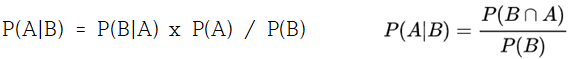

P(A|B)는 1개의 확률이 아니라 여러 개의 카테고리 중에 어떤 카테고리에 속할 확률이 가장 큰지를 나타내는 정보
베이즈 정리의 분모에 있는 P(B)는 입력 텍스트가 주어질 확률이다.

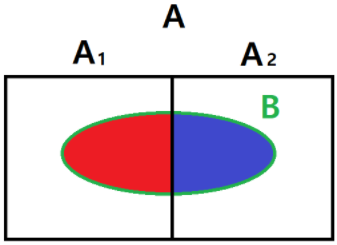
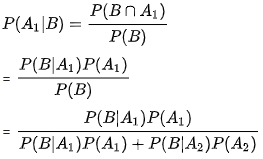


In [107]:
# bayes.py
import math, sys
from konlpy.tag import Okt
class BayesianFilter:
    """ 베이지안 필터 """
    def __init__(self):
        self.words = set() # 출현한 단어 기록
        self.word_dict = {} # 카테고리마다의 출현 횟수 기록
        self.category_dict = {} # 카테고리 출현 횟수 기록
    # 형태소 분석하기 --- (※1)
    def split(self, text):
        results = []
        twitter = Okt()
        # 단어의 기본형 사용 
        malist = twitter.pos(text, norm=True, stem=True) 
        for word in malist:
            # 어미/조사/구두점 등은 대상에서 제외 
            if not word[1] in ["Josa", "Eomi", "Punctuation"]:
                results.append(word[0])
        return results
    # 단어와 카테고리의 출현 횟수 세기 --- (※2)
    def inc_word(self, word, category): # 파격, 광고
        # 단어를 카테고리에 추가하기
        if not category in self.word_dict:
            self.word_dict[category] = {}   # word_dict['광고'] = {}
        if not word in self.word_dict[category]: #   
            self.word_dict[category][word] = 0  # word_dict['광고']['파격'] = 0 : word_dict = {'광고':{'파격':0}}
        self.word_dict[category][word] += 1 # word_dict['광고']['파격'] = 1 : word_dict = {'광고':{'파격':1}}
        self.words.add(word)                   # words.add('파격')
    def inc_category(self, category): # '광고'
        # 카테고리 계산하기
        if not category in self.category_dict:
            self.category_dict[category] = 0 # category_dict['광고'] = 0 : category_dict={'광고' : 0}
        self.category_dict[category] += 1 # category_dict['광고'] = 1 : category_dict={'광고' : 1}
    # 텍스트 학습하기 --- (※3)
    def fit(self, text, category): #  text="파격 세일 - 오늘까지만 30% 할인", category = "광고"
        """ 텍스트 학습 """
        word_list = self.split(text) # text에 있는 값을 공백문자를 기준으로 분리
        for word in word_list: # text값이 리스트로 분리되어 있는 단어를 분석하기 위해 반복문 사용
            self.inc_word(word, category) # 단어와 category를 inc_word 를 사용해서 단어를 카테고리에 추가
        self.inc_category(category)
    
    # 단어 리스트에 점수 매기기--- (※4)
    def score(self, words, category): # words = '재고', category = '광고'
        # print(math.log(1)) # output: 0.0
        # print(math.log(2)) # output: 0.6931471805599453
        # print(math.log(math.e ** 2)) # output: 2.0
        score = math.log(self.category_prob(category)) # 0.5 : 
        # math.log(0.5) # output: -0.6931471805599453

        for word in words:  # words = ('재고', '정리', '할인', '무료', '배송')
            score += math.log(self.word_prob(word, category)) # 0.015384615384615385
        return score
    
    # 예측하기 --- (※5)
    def predict(self, text): #  text = "재고 정리 할인, 무료 배송"
        best_category = None
        max_score = - sys.maxsize    # 9223372036854775807
        words = self.split(text) # words = ['재고', '정리', '할인,', '무료', '배송']
        score_list = []
        for category in self.category_dict.keys(): # {'광고': 5, '중요': 5}
            score = self.score(words, category) # words = '재고', category = '광고'
            score_list.append((category, score))
            if score > max_score: 
                max_score = score
                best_category = category
        return best_category, score_list # 광고, [('광고', -19.485641988358296), ('중요', -20.63806741338132)]
    # 카테고리 내부의 단어 출현 횟수 구하기
    def get_word_count(self, word, category):
        if word in self.word_dict[category]: 
            return self.word_dict[category][word] # word_dict['광고']['할인'] = 1
        else:
            return 0
    # 카테고리 계산
    def category_prob(self, category):
        sum_categories = sum(self.category_dict.values()) # 10
        category_v = self.category_dict[category]
        return category_v / sum_categories # 5/10
        
    # 카테고리 내부의 단어 출현 비율 계산 --- (※6)
    def word_prob(self, word, category):
        n = self.get_word_count(word, category) + 1 # ---(※6a)      
        d = sum(self.word_dict[category].values()) + len(self.words) # 28 37, 17 37
        return n / d 

In [108]:
bf = BayesianFilter()
# 텍스트 학습
bf.fit("파격 세일 - 오늘까지만 30% 할인", "광고")
bf.fit("쿠폰 선물 & 무료 배송", "광고")
bf.fit("현데계 백화점 세일", "광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bf.fit("인기 제품 기간 한정 세일", "광고")
bf.fit("오늘 일정 확인", "중요")
bf.fit("프로젝트 진행 상황 보고","중요")
bf.fit("계약 잘 부탁드립니다","중요")
bf.fit("회의 일정이 등록되었습니다.","중요")
bf.fit("오늘 일정이 없습니다.","중요")
# 예측
pre, scorelist = bf.predict("재고 정리 할인, 무료 배송")
print("결과 =", pre)
print(scorelist)

결과 = 광고
[('광고', -19.485641988358296), ('중요', -20.63806741338132)]


# 레벤슈타인 거리 구하기
#가나다라”와 “가마바라”는 얼마나 비슷할까? 레벤슈타인 거리는 “가나다라”를 “가마바라”로 편집할 때 몇 번의 문자열 조작이 필요한지에 주목해서 단어의 거리를 구한다.

“가나다라”를 “가마바라”로 변경하려면 2번의 조작이 필요하다. 따라서 편집 비용(조작 횟수)은 2라고 할 수 있으며, 이러한 2를 레벤슈타인 거리라고 한다. 

레벤슈타인 거리를 계산하기 위해 2차원 테이블(matrix 변수)를 준비했다. 이를 기반으로 다음과 같은 표를 만든다.
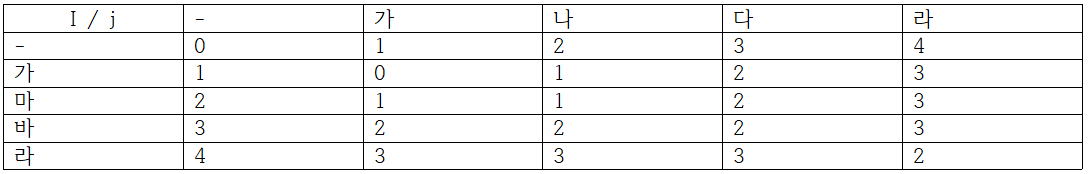

만약 비교하는 글씨가 같으면 m[i][j] = m[i-1][j-1] + 0<br />
비교하는 글씨가 다르면 m[i][j] = m[i-1][j-1] + 1을 해서 마지막 배열에 있는 값이 레벤슈타인 거리이다.


In [21]:
def calc_distance(a, b): # "가나다라","가마바라"
    ''' 레벤슈타인 거리 계산하기 '''
    if a == b: return 0
    a_len = len(a)
    b_len = len(b)
    if a == "": return b_len
    if b == "": return a_len
    # 2차원 표 (a_len+1, b_len+1) 준비하기 --- (※1)
    matrix = [[] for i in range(a_len+1)] # [[], [], [], [], []]
    for i in range(a_len+1): # 0으로 초기화
        matrix[i] = [0 for j in range(b_len+1)]
        #[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
    # 0일 때 초깃값을 설정
    for i in range(a_len+1):
        matrix[i][0] = i 
        #[[0, 0, 0, 0, 0], [1, 0, 0, 0, 0], [2, 0, 0, 0, 0], [3, 0, 0, 0, 0], [4, 0, 0, 0, 0]]
    for j in range(b_len+1):
        matrix[0][j] = j
        #[[0, 1, 2, 3, 4], [1, 0, 0, 0, 0], [2, 0, 0, 0, 0], [3, 0, 0, 0, 0], [4, 0, 0, 0, 0]]
    # 표 채우기 --- (※2)
    for i in range(1, a_len+1):
        ac = a[i-1] # 가, 나, 다, 라
        for j in range(1, b_len+1): 
            bc = b[j-1] # 가, 마, 바, 라
            cost = 0 if (ac == bc) else 1 # 같은 문자이면 0,다른 문자이면 1
            matrix[i][j] = matrix[i-1][j-1] + cost
    return matrix[a_len][b_len]
# "가나다라"와 "가마바라"의 거리 --- (※3)
print(calc_distance("가나다라","가마바라"))
# 실행 예
samples = ["신촌역","신천군","신천역","신발","마곡역"]
base = samples[0]
r = sorted(samples, key = lambda n: calc_distance(base, n))
#['신촌역','신천역','신천군','신발','마곡역']
for n in r:
    print(calc_distance(base, n), n)

2
0 신촌역
1 신천역
2 신천군
2 마곡역
3 신발


In [8]:
# N-gram 으로 유사도 구하기
#“N-gram”이란 텍스트에서 “이웃한 N개의 문자”를 의미
# 출현하는 단어의 종류와 빈도를 확인할 수 있다.
# 논문 도용등을 확인 할 때 사용

def ngram(s, num):
    res = []
    slen = len(s) - num + 1
    for i in range(slen):
        ss = s[i:i+num]
        res.append(ss)
    return res
def diff_ngram(sa, sb, num):
    a = ngram(sa, num)
    b = ngram(sb, num)
    r = []
    cnt = 0
    for i in a:
        for j in b:
            if i == j:
                cnt += 1
                r.append(i)
    return cnt / len(a), r
a = "오늘 강남에서 맛있는 스파게티를 먹었다."
b = "강남에서 먹었던 오늘의 스파게티는 맛있었다."
# 2-gram
r2, word2 = diff_ngram(a, b, 2)
print("2-gram:", r2, word2)
# 3-gram
r3, word3  = diff_ngram(a, b, 3)
print("3-gram:", r3, word3)

2-gram: 0.7619047619047619 ['오늘', '강남', '남에', '에서', '서 ', ' 맛', '맛있', '는 ', ' 스', '스파', '파게', '게티', ' 먹', '먹었', '었다', '다.']
3-gram: 0.45 ['강남에', '남에서', '에서 ', ' 맛있', ' 스파', '스파게', '파게티', ' 먹었', '었다.']


In [9]:
from pprint import pprint
import json
dic = json.load(open("markov-toji.json","r"))
pprint(dic["걱정"])

{'들': {'을': 1},
 '마라': {'\n': 3, '.': 3},
 '말': {'게': 1},
 '말고': {'마저': 1, '처': 1},
 '은': {'마라': 2, '안': 1},
 '을': {'다': 1},
 '이': {'없을': 1, '요': 1, '있고': 1, '있더라고': 1},
 '이고': {'\n': 1, '송장': 1},
 '이다': {'그': 1},
 '이며': {'이윽고': 1},
 '이제': {'.': 1},
 '일세': {'.': 1},
 '하실': {'것': 1},
 '할': {'것': 1}}


마르코프 체인의 정의란 마르코프 성질을 가진 이산 확률과정을 뜻함<br />
마르코프 성질은 ‘특정 상태의 확률은 오직 과거의 상태에 의존한다’라는 것임<br />
예를 들어 오늘의 날씨가 맑다면 내일의 날씨는 맑을지 비가 내릴지를 확률적으로 표현할 수 있다. <br />
연속적인 현상을 단순히 표현할 때는 마르코프 체인을 가정하고 쓸 수 있고, 종종 단순한 모델이 강력한 효과를 발휘할 때도 있다<br />

문장을 만드는 과정을 정리하면 다음과 같다.<br />
(1) 문장을 단어로 분할(형태소 분석)한다.<br />
(2) 단어의 잔호 연결을 딕셔너리에 등록한다.<br />
(3) 사전을 사용해 임의의 문장을 생성한다.<br />

3개의 요소씩 묶어 다음과 같이 사전으로 등록한다.<br />
그는 고양이를 좋아합니다”라는 문장이 있다고 하자.<br />
그|는|고양이<br />
는|고양이|를<br />
고양이|를|좋아<br />
를|좋아한다.<br />

pip install py-hanspell

설치가 안되는 경우 https://github.com/ssut/py-hanspell 에서 다운 받아 원하는 폴더에 저장 한후 압축을 푼다.

python setup.py install

In [8]:
from hanspell import spell_checker
input_list = spell_checker.check(u'안녕 하세요. 저는 한국인 입니다.')
result = input_list.checked
print(result)

안녕하세요. 저는 한국인입니다.


In [14]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
import urllib.request
import os, re, json, random
from hanspell import spell_checker
# 마르코프 체인 딕셔너리 만들기 --- (※1)
def make_dic(words):
    tmp = ["@"]
    dic = {}
    for word in words:
        tmp.append(word)
        if len(tmp) < 3: continue
        if len(tmp) > 3: tmp = tmp[1:]
        set_word3(dic, tmp)
        if word == ".":
            tmp = ["@"]
            continue
    return dic
# 딕셔너리에 데이터 등록하기 --- (※2)
def set_word3(dic, s3):
    w1, w2, w3 = s3
    if not w1 in dic: dic[w1] = {}
    if not w2 in dic[w1]: dic[w1][w2] = {}
    if not w3 in dic[w1][w2]: dic[w1][w2][w3] = 0
    dic[w1][w2][w3] += 1
# 문장 만들기 --- (※3)
def make_sentence(dic):
    ret = []
    if not "@" in dic: return "no dic" 
    top = dic["@"]
    w1 = word_choice(top)
    w2 = word_choice(top[w1])
    ret.append(w1)
    ret.append(w2)
    while True:
        w3 = word_choice(dic[w1][w2])
        ret.append(w3)
        if w3 == ".": break
        w1, w2 = w2, w3
    ret = "".join(ret)
    # 네이버 맞춤법 검사기를 사용합니다.
    spelled_sent = spell_checker.check(ret)
    checked_sent = spelled_sent.checked
    # 리턴
    return checked_sent
def word_choice(sel):
    keys = sel.keys()
    return random.choice(list(keys))
# 문장 읽어 들이기 --- (※4)
toji_file = "toji.txt"
dict_file = "markov-toji.json"
if not os.path.exists(dict_file):
    # 토지 텍스트 파일 읽어 들이기
    fp = codecs.open("BEXX0003.txt", "r", encoding="utf-16")
    soup = BeautifulSoup(fp, "html.parser")
    body = soup.select_one("body > text")
    text = body.getText()
    text = text.replace("…", "") # 현재 koNLPy가 …을 구두점으로 잡지 못하는 문제 임시 해결
    # 형태소 분석
    twitter = Twitter()
    malist = twitter.pos(text, norm=True)
    words = []
    for word in malist:
        # 구두점 등은 대상에서 제외(단 마침표는 포함)
        if not word[1] in ["Punctuation"]:
            words.append(word[0])
        if word[0] == ".":
            words.append(word[0])
    # 딕셔너리 생성
    dic = make_dic(words)
    json.dump(dic, open(dict_file,"w", encoding="utf-8"))
else:
    dic = json.load(open(dict_file,"r"))
# 문장 만들기 --- (※6)
for i in range(3):
    s = make_sentence(dic)
    print(s)
    print("---")

방문을 활짝 열어젖히니 바람이 났을 거라고 생각들 했다.
---
어매 불쌍한 우리 어매.
---
근 반년 가량 치수의 신발이 나란히 놓여있었다.
---


In [16]:
# 생성한 사전을 살펴보자 “걱정”에서 연속되는 어구를 확인하면 다음과 같다.
from pprint import pprint
import json
dic = json.load(open("markov-toji.json","r"))
pprint(dic["걱정"])

{'들': {'을': 1},
 '마라': {'\n': 3, '.': 3},
 '말': {'게': 1},
 '말고': {'마저': 1, '처': 1},
 '은': {'마라': 2, '안': 1},
 '을': {'다': 1},
 '이': {'없을': 1, '요': 1, '있고': 1, '있더라고': 1},
 '이고': {'\n': 1, '송장': 1},
 '이다': {'그': 1},
 '이며': {'이윽고': 1},
 '이제': {'.': 1},
 '일세': {'.': 1},
 '하실': {'것': 1},
 '할': {'것': 1}}


In [ ]:
# 마르코프 체인과 함께 문장을 생성하는 알고리즘으로 유명한 것으로 
# 재귀 신경망(Recurrent Neural Network / RNN)과  LSTM(Long Short Term-Memory)이 있다.
# 실행 시간이 무척 오래 걸림.
import codecs
from bs4 import BeautifulSoup
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random, sys
fp = codecs.open("./BEXX0003.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body")
text = body.getText() + " "
print('코퍼스의 길이: ', len(text))
# 문자를 하나하나 읽어 들이고 ID 붙이기
chars = sorted(list(set(text)))
print('사용되고 있는 문자의 수:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars)) # 문자 → ID
indices_char = dict((i, c) for i, c in enumerate(chars)) # ID → 문자
# 텍스트를 maxlen개의 문자로 자르고 다음에 오는 문자 등록하기
maxlen = 20
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])#문장
    next_chars.append(text[i + maxlen])
# print(sentences[:10])
'''
['\n\n제1편 어둠의 발소리\n서(序)\n1', '1편 어둠의 발소리\n서(序)\n1897', 
'어둠의 발소리\n서(序)\n1897년의 ', ' 발소리\n서(序)\n1897년의 한가위', 
'리\n서(序)\n1897년의 한가위.\n까', '(序)\n1897년의 한가위.\n까치들이', 
'\n1897년의 한가위.\n까치들이 울타', '97년의 한가위.\n까치들이 울타리 안', 
'의 한가위.\n까치들이 울타리 안 감나', '가위.\n까치들이 울타리 안 감나무에 ']
'''
# print(next_chars[:10]) #['8', '년', '한', '.', '치', ' ', '리', ' ', '무', '와']

print('학습할 구문의 수:', len(sentences)) # 103888 = (311682  - 20) / 3
print('텍스트를 ID 벡터로 변환합니다...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)# bool타입인 3차원 배열
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)# bool타입인 2차원배열
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1   # X와 y에 문자에 해당하는 위치에  True값 저장
    y[i, char_indices[next_chars[i]]] = 1
#print(X[:10])
'''
[[[ True False False ... False False False]
  [ True False False ... False False False]
  [False False False ... False False False]
...
[ True False False ... False False False]
  [ True False False ... False False False]
  [False False False ... False False False]]]
'''
#print(y[:10])
'''
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False  True False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
'''
# 모델 구축하기(LSTM)
print('모델을 구축합니다...') # 합성 신경망으로 모델 구축
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))# 재귀 신경망 신경망 합성층 생성
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
# Optimizer는 딥러닝에서 Network가 빠르고 정확하게 학습하는 것을 목표로 한다
# optimizer의 종류 Momentum, NAG(Nesterov Accelrated Gradient), Adagrad(Adaptive Gradient)
#                  RMSProp, Adadelta(Adaptive Delta), Adam(Adaptive Moment Estimation)
# 아래 사이트 참조
# https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# 후보를 배열에서 꺼내기
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
# 학습시키고 텍스트 생성하기 반복
for iteration in range(1, 60):
    print()
    print('-' * 50)
    print('반복 =', iteration)
    model.fit(X, y, batch_size=128) # 
    # 임의의 시작 텍스트 선택하기
    start_index = random.randint(0, len(text) - maxlen - 1)
    # 다양한 다양성의 문장 생성
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('--- 다양성 = ', diversity)
        generated = ''
        sentence = text[start_index: start_index + maxlen] #피하여 방랑하다가 백부인 우관선사를
        generated += sentence                              #피하여 방랑하다가 백부인 우관선사를
        print('--- 시드 = "' + sentence + '"')
        sys.stdout.write(generated)
        # 시드를 기반으로 텍스트 자동 생성
        for i in range(400):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.   # 해당 문자에 1. 을 대입
            # 다음에 올 문자를 예측하기
            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity) # 다음 문자에 해당하는 index를 받아옴.
            next_char = indices_char[next_index] #피하여 방랑하다가 백부인 우관선사를 ?
            # 출력하기
            generated += next_char # 400번 반복 할때마다 한글자씩 붙인다.
            sentence = sentence[1:] + next_char #하여 방랑하다가 백부인 우관선사를 ?
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

In [ ]:
# BEXX0003.txt파일을 /cgi-bin디렉터리에 복사해 놓아야 한다.
# python –m http.server --cgi 8080

# chatbot.py
#!/usr/bin/env python3
import cgi
from botengine  import make_reply

# 입력 양식의 글자 추출하기 --- (※1)
form = cgi.FieldStorage()

# 메인 처리 --- (※2)
def main():
    m = form.getvalue("m", default="")
    if   m == "" : show_form()
    elif m == "say" : api_say()

# 사용자의 입력에 응답하기 --- (※3)
def api_say():
    print("Content-Type: text/plain; charset=utf-8")
    print("")
    txt = form.getvalue("txt", default="")
    if txt == "": return
    res = make_reply(txt)
    print(res)

# 입력 양식 출력하기 --- (※4)
def show_form():
    print("Content-Type: text/html; charset=utf-8")
    print("")
    print("""
    <html><meta charset="utf-8"><body>
    <script src="https://code.jquery.com/jquery-3.1.1.min.js"></script>
    <style>
        h1   { background-color: #ffe0e0; }
        div  { padding:10px; }
        span { border-radius: 10px; background-color: #ffe0e0; padding:8px; }
        .bot { text-align: left; }
        .usr { text-align: right; }
    </style>
    <h1>대화하기</h1>
    <div id="chat"></div>
    <div class='usr'><input id="txt" size="40">
    <button onclick="say()">전송</button></div>
    <script>
    var url = "./chatbot.py";
    function say() {
      var txt = $('#txt').val();
      $.get(url, {"m":"say","txt":txt},
        function(res) {
          var html = "<div class='usr'><span>" + esc(txt) +
            "</span>: 나</div><div class='bot'> 봇:<span>" + 
            esc(res) + "</span></div>";
          $('#chat').html($('#chat').html()+html);
          $('#txt').val('').focus();
        });
    }
    function esc(s) {
        return s.replace('&', '&amp;').replace('<','&lt;')
                .replace('>', '&gt;');
    }
    </script></body></html>
    """)

main()

In [ ]:
# botengine.py
import codecs
from bs4 import BeautifulSoup
import urllib.request
from konlpy.tag import Okt
import os, re, json, random
from hanspell import spell_checker

dict_file = "chatbot-data.json"
dic = {}
twitter = Okt()

# 딕셔너리에 단어 등록하기 --- (※1)
def register_dic(words):
    global dic
    if len(words) == 0: return
    tmp = ["@"]
    for i in words:
        word = i[0]
        if word == "" or word == "\r\n" or word == "\n": continue
        tmp.append(word)
        if len(tmp) < 3: continue
        if len(tmp) > 3: tmp = tmp[1:]
        set_word3(dic, tmp)
        if word == "." or word == "?":
            tmp = ["@"]
            continue
    # 딕셔너리가 변경될 때마다 저장하기
    json.dump(dic, open(dict_file,"w", encoding="utf-8"))
# 딕셔너리에 글 등록하기
def set_word3(dic, s3):
    w1, w2, w3 = s3
    if not w1 in dic: dic[w1] = {}
    if not w2 in dic[w1]: dic[w1][w2] = {}
    if not w3 in dic[w1][w2]: dic[w1][w2][w3] = 0
    dic[w1][w2][w3] += 1
# 문장 만들기 --- (※2)
def make_sentence(head):
    if not head in dic: return ""
    ret = []
    if head != "@": ret.append(head)        
    top = dic[head]
    w1 = word_choice(top)
    w2 = word_choice(top[w1])
    ret.append(w1)
    ret.append(w2)
    while True:
        if w1 in dic and w2 in dic[w1]:
            w3 = word_choice(dic[w1][w2])
        else:
            w3 = ""
        ret.append(w3)
        if w3 == "." or w3 == "？ " or w3 == "": break
        w1, w2 = w2, w3
    ret = "".join(ret)
    # 띄어쓰기
    spelled_sent = spell_checker.check(ret)
    data = spelled_sent.checked
    # 리턴
    return data

def word_choice(sel):
    keys = sel.keys()
    return random.choice(list(keys))
# 챗봇 응답 만들기 --- (※3)
def make_reply(text):
    # 단어 학습 시키기
    if not text[-1] in [".", "?"]: text += "."
    words = twitter.pos(text)
    register_dic(words)
    # 사전에 단어가 있다면 그것을 기반으로 문장 만들기
    for word in words:
        face = word[0]
        if face in dic: return make_sentence(face)
    return make_sentence("@")

# 딕셔너리가 있다면 읽어 들이기
if os.path.exists(dict_file):
    dic = json.load(open(dict_file,"r"))

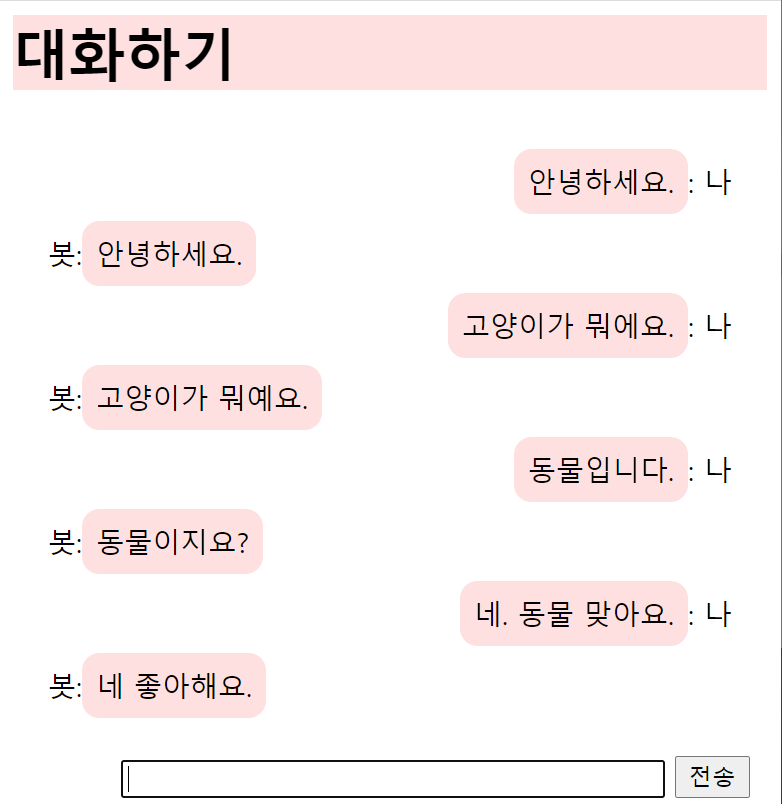